In [1]:
# Import libraries 
import pandas as pd
import string

## 1. Loading the dataset

In [2]:
# Load dataset
data = pd.read_csv('train_tweets.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
train_label = data['label']
data.drop('label', axis=1, inplace=True)
data['label'] = train_label

In [4]:
data.head()

,id,tweet,label
0,1,@user when a father is dysfunctional and is s...,0
1,2,@user @user thanks for #lyft credit i can't us...,0
2,3,bihday your majesty,0
3,4,#model i love u take with u all the time in ...,0
4,5,factsguide: society now #motivation,0


In [5]:
# distribution of class
data['label'].value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [6]:
# Import spacy
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# Import stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [7]:
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
import spacy

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

In [10]:
def clean_text(tweet):
    # Convert to lower case
    cleaned = tweet.lower()
    
    # Remove non-alphabetic characters
    cleaned = re.sub(r'[^a-zA-Z\s]', '', cleaned)
    
    # Removing "\r\n", "amp", "<", ">", "user", "m", "s" and "u" from the text
    cleaned = re.sub('(\r\n|amp|<|>|user)+','', cleaned)
    
    # Remove punctuations
    punctuations = string.punctuation
    cleaned = "".join(character for character in cleaned if character not in punctuations)
    
    # Process the tweet using spaCy
    my_doc = nlp(cleaned)
    
    # Tokenize and lemmatize
    token_list = []
    for token in my_doc:
        if not token.is_stop:
            token_list.append(token.lemma_)
    
    # Join the tokens back into a single string
    cleaned = " ".join(token_list)
    
    return cleaned

In [11]:
# Apply preprocessing to the tweets
data['clean_tweet'] = data['tweet'].apply(clean_text)

In [12]:
data.head()

,id,tweet,label,clean_tweet
0,1,@user when a father is dysfunctional and is s...,0,father dysfunctional selfish drag kid dysfu...
1,2,@user @user thanks for #lyft credit i can't us...,0,thank lyft credit not use cause not offer w...
2,3,bihday your majesty,0,bihday majesty
3,4,#model i love u take with u all the time in ...,0,model love u u time ur
4,5,factsguide: society now #motivation,0,factsguide society motivation


In [13]:
data.columns

Index(['id', 'tweet', 'label', 'clean_tweet'], dtype='object')

In [14]:
# Separate tweets by label
non_racist_tweets = data[data['label'] == 0]['clean_tweet']
racist_tweets = data[data['label'] == 1]['clean_tweet']

## Generate and display word clouds

In [15]:
from collections import Counter

In [16]:
# Calculate word frequencies
def calculate_word_frequencies(tweets):
    all_words = " ".join(tweets).split()
    word_freq = Counter(all_words)
    return word_freq

In [17]:
# Ensure we calculate frequencies correctly
non_racist_word_freq = calculate_word_frequencies(non_racist_tweets)
racist_word_freq = calculate_word_frequencies(racist_tweets)

In [18]:
# Check contents of word frequencies to ensure correctness
non_racist_word_freq.most_common(45)  # Show top 45 most common words

[('love', 2950),
 ('day', 2797),
 ('not', 2256),
 ('happy', 1754),
 ('good', 1316),
 ('time', 1197),
 ('life', 1193),
 ('m', 1174),
 ('u', 1121),
 ('today', 1068),
 ('like', 961),
 ('positive', 932),
 ('thankful', 926),
 ('new', 926),
 ('father', 916),
 ('smile', 889),
 ('bihday', 870),
 ('get', 853),
 ('go', 851),
 ('people', 790),
 ('s', 773),
 ('work', 768),
 ('want', 733),
 ('friend', 713),
 ('come', 701),
 ('look', 685),
 ('wait', 636),
 ('feel', 616),
 ('weekend', 612),
 ('need', 611),
 ('healthy', 606),
 ('family', 589),
 ('fun', 589),
 ('week', 587),
 ('thank', 565),
 ('summer', 564),
 ('girl', 560),
 ('way', 539),
 ('find', 535),
 ('know', 526),
 ('friday', 524),
 ('great', 516),
 ('think', 514),
 ('beautiful', 507),
 ('bull', 506)]

In [19]:
racist_word_freq.most_common(45)  # Show top 45 most common words

[('not', 229),
 ('trump', 207),
 ('white', 154),
 ('libtard', 150),
 ('black', 146),
 ('like', 141),
 ('woman', 113),
 ('racist', 109),
 ('s', 98),
 ('politic', 97),
 ('people', 95),
 ('liberal', 92),
 ('allahsoil', 92),
 ('man', 75),
 ('hate', 75),
 ('sjw', 74),
 ('obama', 72),
 ('new', 71),
 ('say', 68),
 ('retweet', 67),
 ('racism', 64),
 ('feel', 63),
 ('listen', 61),
 ('think', 58),
 ('america', 51),
 ('comment', 50),
 ('video', 50),
 ('girl', 49),
 ('stomp', 47),
 ('m', 46),
 ('miami', 46),
 ('need', 44),
 ('race', 43),
 ('thank', 43),
 ('year', 43),
 ('get', 40),
 ('good', 40),
 ('look', 38),
 ('stop', 38),
 ('go', 37),
 ('act', 37),
 ('sex', 36),
 ('late', 35),
 ('fuck', 35),
 ('want', 35)]

In [20]:
data.head(10)

,id,tweet,label,clean_tweet
0,1,@user when a father is dysfunctional and is s...,0,father dysfunctional selfish drag kid dysfu...
1,2,@user @user thanks for #lyft credit i can't us...,0,thank lyft credit not use cause not offer w...
2,3,bihday your majesty,0,bihday majesty
3,4,#model i love u take with u all the time in ...,0,model love u u time ur
4,5,factsguide: society now #motivation,0,factsguide society motivation
5,6,[2/2] huge fan fare and big talking before the...,0,huge fan fare big talking leave chaos pay di...
6,7,@user camping tomorrow @user @user @user @use...,0,ce tomorrow danny
7,8,the next school year is the year for exams.ð...,0,school year year exam not think school exam ...
8,9,we won!!! love the land!!! #allin #cavs #champ...,0,win love land allin cavs chions cleveland clev...
9,10,@user @user welcome here ! i'm it's so #gr...,0,welcome m gr


In [21]:
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

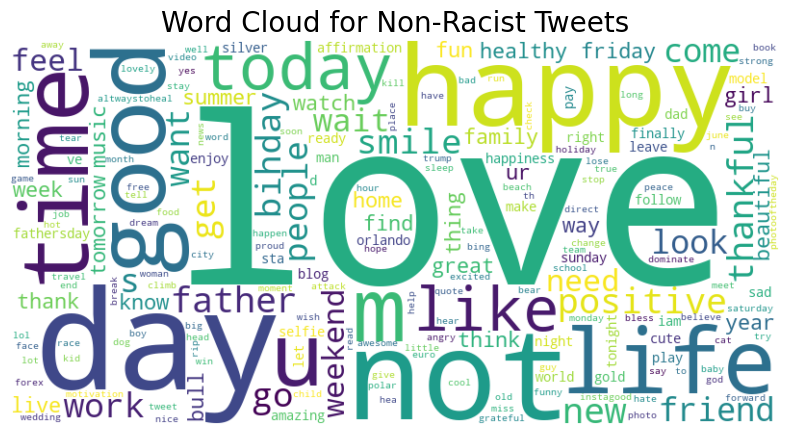

In [22]:
generate_wordcloud(non_racist_word_freq, 'Word Cloud for Non-Racist Tweets')

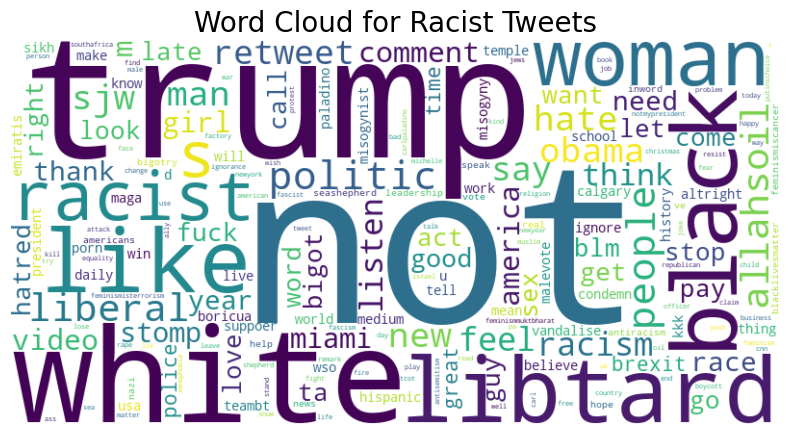

In [23]:
generate_wordcloud(racist_word_freq, 'Word Cloud for Racist Tweets')

## Creating Meta Features

In [24]:
def average_word_length(tweet):
    words = tweet.split()
    if len(words) == 0:
        return 0
    return round(sum(len(word) for word in words) / len(words),2)

In [25]:
# Number of words in original text
data["tweet_word_count"] = data["tweet"].apply(lambda x : len(x.split()))

# Number of words in cleaned text
data["tweet_cleaned_word_count"] = data["clean_tweet"].apply(lambda x : len(x.split()))

# Number of characters including spaces in the cleaned text
data["char_count"] = data["clean_tweet"].apply(lambda x : len(x))

# number of characters excluding spaces in the cleaned text
data["char_count_without_spaces"] = data["clean_tweet"].apply(lambda x : len(x.replace(" ","")))

# number of hashtags
data["hashtag_count"] = data["tweet"].apply(lambda x: x.count('#'))

# number of mentions
data["mentions_count"] = data["tweet"].apply(lambda x: x.count('@'))

# average word length in the cleaned text
data["average_word_length"] = data["clean_tweet"].apply(average_word_length)

# number of special characters
data["special_char_count"] = data["tweet"].apply(lambda x: sum(1 for char in x if char in string.punctuation))

In [26]:
data.head(10)

,id,tweet,label,clean_tweet,tweet_word_count,tweet_cleaned_word_count,char_count,char_count_without_spaces,hashtag_count,mentions_count,average_word_length,special_char_count
0,1,@user when a father is dysfunctional and is s...,0,father dysfunctional selfish drag kid dysfu...,18,7,59,47,1,1,6.71,3
1,2,@user @user thanks for #lyft credit i can't us...,0,thank lyft credit not use cause not offer w...,19,13,88,69,3,2,5.31,8
2,3,bihday your majesty,0,bihday majesty,3,2,17,13,0,0,6.50,0
3,4,#model i love u take with u all the time in ...,0,model love u u time ur,14,6,29,18,1,0,2.83,4
4,5,factsguide: society now #motivation,0,factsguide society motivation,4,3,35,27,1,0,9.00,2
5,6,[2/2] huge fan fare and big talking before the...,0,huge fan fare big talking leave chaos pay di...,19,10,68,55,1,0,5.50,6
6,7,@user camping tomorrow @user @user @user @use...,0,ce tomorrow danny,11,3,28,15,0,8,5.00,8
7,8,the next school year is the year for exams.ð...,0,school year year exam not think school exam ...,21,13,94,77,7,0,5.92,9
8,9,we won!!! love the land!!! #allin #cavs #champ...,0,win love land allin cavs chions cleveland clev...,11,8,62,52,5,0,6.50,11
9,10,@user @user welcome here ! i'm it's so #gr...,0,welcome m gr,10,3,24,10,1,2,3.33,7


In [27]:
# Dictionary of noun and verb POS tags
pos_dic = {"noun" : ["NNP", "NN", "NNS", "NNPS"], 
           "verb" : ["VBZ", "VB", "VBD","VBG", "VBN"],
           "adjectives" : ["JJ", "JJR", "JJS"],
           "adverbs": ["RB", "RBR", "RBS"]
          }

In [28]:
# Function for noun and verb counts
def pos_check(txt, family):

    # spacy document
    txt = nlp(txt)
    
    all_tags = []

    # Get pos tag
    for w in txt:
        all_tags.append(w.tag_)
    
    count = 0

    # Count number of nouns and verbs
    for tag in all_tags:
        if tag in pos_dic[family]:
            count += 1

    return count

In [29]:
# Applying the function
data["noun_count"] = data["clean_tweet"].apply(lambda x : pos_check(x, "noun"))

In [30]:
data['verb_count'] = data["clean_tweet"].apply(lambda x : pos_check(x, "verb"))

In [31]:
data['adjective_count'] = data["clean_tweet"].apply(lambda x : pos_check(x, "adjectives"))

In [32]:
data['adverbs_count'] = data["clean_tweet"].apply(lambda x : pos_check(x, "adverbs"))

In [33]:
train_label = data['label']
data.drop('label', axis=1, inplace=True)
data['label'] = train_label

In [34]:
data.head(10)

,id,tweet,clean_tweet,tweet_word_count,tweet_cleaned_word_count,char_count,char_count_without_spaces,hashtag_count,mentions_count,average_word_length,special_char_count,noun_count,verb_count,adjective_count,adverbs_count,label
0,1,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfu...,18,7,59,47,1,1,6.71,3,6,1,0,0,0
1,2,@user @user thanks for #lyft credit i can't us...,thank lyft credit not use cause not offer w...,19,13,88,69,3,2,5.31,8,7,2,1,2,0
2,3,bihday your majesty,bihday majesty,3,2,17,13,0,0,6.50,0,2,0,0,0,0
3,4,#model i love u take with u all the time in ...,model love u u time ur,14,6,29,18,1,0,2.83,4,4,0,0,0,0
4,5,factsguide: society now #motivation,factsguide society motivation,4,3,35,27,1,0,9.00,2,2,0,1,0,0
5,6,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay di...,19,10,68,55,1,0,5.50,6,8,0,2,0,0
6,7,@user camping tomorrow @user @user @user @use...,ce tomorrow danny,11,3,28,15,0,8,5.00,8,2,0,0,0,0
7,8,the next school year is the year for exams.ð...,school year year exam not think school exam ...,21,13,94,77,7,0,5.92,9,11,0,0,1,0
8,9,we won!!! love the land!!! #allin #cavs #champ...,win love land allin cavs chions cleveland clev...,11,8,62,52,5,0,6.50,11,7,1,0,0,0
9,10,@user @user welcome here ! i'm it's so #gr...,welcome m gr,10,3,24,10,1,2,3.33,7,0,0,0,0,0


In [35]:
data.columns

Index(['id', 'tweet', 'clean_tweet', 'tweet_word_count',
       'tweet_cleaned_word_count', 'char_count', 'char_count_without_spaces',
       'hashtag_count', 'mentions_count', 'average_word_length',
       'special_char_count', 'noun_count', 'verb_count', 'adjective_count',
       'adverbs_count', 'label'],
      dtype='object')

### Model Building for Meta Features

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [38]:
# Import Tf-Idf Vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# Tf-Idf Vectoriser
word_tfidf = TfidfVectorizer(max_features=5000)

In [40]:
X = word_tfidf.fit_transform(data['clean_tweet']).toarray()

In [41]:
y = data['label']

In [42]:
from scipy.sparse import hstack, csr_matrix

In [43]:
# list of meta features
meta_features = data[['tweet_word_count', 'tweet_cleaned_word_count', 'char_count', 'char_count_without_spaces', 'hashtag_count', 'mentions_count', 'average_word_length', 'special_char_count', 'noun_count', 'verb_count', 'adjective_count', 'adverbs_count']]

In [44]:
# Combine TF-IDF features with meta features
X_final = hstack([X, csr_matrix(meta_features)], "csr")

In [45]:
# Split the data into training and validation sets
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [46]:
# Train and Validation datasets
(X_train_final.shape, y_train_final.shape), (X_val_final.shape, y_val_final.shape)

(((25569, 5012), (25569,)), ((6393, 5012), (6393,)))

## Naive Bayes model training

In [47]:
# Multinomial Naive Bayes Model
nb_model = naive_bayes.MultinomialNB()

In [48]:
# Fit model
nb_model.fit(X_train_final, y_train_final)

MultinomialNB()

In [49]:
print("Training accuracy: ", accuracy_score(y_train_final, nb_model.predict(X_train_final)))

Training accuracy:  0.9499002698580312


In [50]:
print("Validation accuracy: ", accuracy_score(y_val_final, nb_model.predict(X_val_final)))

Validation accuracy:  0.9447833567964962


In [51]:
print(classification_report(y_val_final, nb_model.predict(X_val_final)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.93      0.25      0.39       456

    accuracy                           0.94      6393
   macro avg       0.94      0.62      0.68      6393
weighted avg       0.94      0.94      0.93      6393



In [52]:
print(confusion_matrix(y_val_final, nb_model.predict(X_val_final)))

[[5928    9]
 [ 344  112]]


In [53]:
print("F-1 score using Gaussian Naive Bayes is : ", f1_score(y_val_final, nb_model.predict(X_val_final)))

F-1 score using Gaussian Naive Bayes is :  0.3882149046793761


## Logistic Regression model training

In [54]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)

In [55]:
# Fit model
lr_model.fit(X_train_final, y_train_final)

C:\Users\udmitra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [56]:
print("Training accuracy: ", accuracy_score(y_train_final, lr_model.predict(X_train_final)))

Training accuracy:  0.958113340373108


In [57]:
print("Validation accuracy: ", accuracy_score(y_val_final, lr_model.predict(X_val_final)))

Validation accuracy:  0.9529172532457375


In [58]:
print(classification_report(y_val_final, lr_model.predict(X_val_final)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5937
           1       0.90      0.38      0.54       456

    accuracy                           0.95      6393
   macro avg       0.93      0.69      0.76      6393
weighted avg       0.95      0.95      0.94      6393



In [59]:
print(confusion_matrix(y_val_final, lr_model.predict(X_val_final)))

[[5918   19]
 [ 282  174]]


In [60]:
print("F-1 score using Logistic Regression model is : ", f1_score(y_val_final, lr_model.predict(X_val_final)))

F-1 score using Logistic Regression model is :  0.5362095531587057


### Hence, we would be considering **Logistic Regression** model as the final one.

Implementing the same on the **Test Dataset**.

In [61]:
# Load dataset
data_test = pd.read_csv('test_tweets.csv')
data_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [62]:
# Apply preprocessing to the tweets in the test data
data_test['clean_tweet'] = data_test['tweet'].apply(clean_text)

In [63]:
data_test.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want new bird movie ...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy ...
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation yes harry...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmi...


### Creating Meta features for the Test data

In [64]:
# Number of words in original text
data_test["tweet_word_count"] = data_test["tweet"].apply(lambda x : len(x.split()))

# Number of words in cleaned text
data_test["tweet_cleaned_word_count"] = data_test["clean_tweet"].apply(lambda x : len(x.split()))

# Number of characters including spaces in the cleaned text
data_test["char_count"] = data_test["clean_tweet"].apply(lambda x : len(x))

# number of characters excluding spaces in the cleaned text
data_test["char_count_without_spaces"] = data_test["clean_tweet"].apply(lambda x : len(x.replace(" ","")))

# number of hashtags
data_test["hashtag_count"] = data_test["tweet"].apply(lambda x: x.count('#'))

# number of mentions
data_test["mentions_count"] = data_test["tweet"].apply(lambda x: x.count('@'))

# average word length in the cleaned text
data_test["average_word_length"] = data_test["clean_tweet"].apply(average_word_length)

# number of special characters
data_test["special_char_count"] = data_test["tweet"].apply(lambda x: sum(1 for char in x if char in string.punctuation))

In [65]:
data_test.head(10)

,id,tweet,clean_tweet,tweet_word_count,tweet_cleaned_word_count,char_count,char_count_without_spaces,hashtag_count,mentions_count,average_word_length,special_char_count
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...,9,8,75,65,7,0,8.12,7
1,31964,@user #white #supremacists want everyone to s...,white supremacist want new bird movie ...,16,7,52,36,4,1,5.14,5
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy ...,9,7,55,42,4,0,6.00,8
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation yes harry...,22,9,72,60,3,0,6.67,8
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmi...,15,11,68,55,2,0,5.00,4
5,31968,choose to be :) #momtips,choose momtip,5,2,17,12,1,0,6.00,3
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,inside die eye ness smokeyeyes tire lonel...,12,9,58,45,5,0,5.00,5
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,finishedtattooinkedinkloveit thanksaleeee,4,2,45,40,8,0,20.00,11
8,31971,@user @user @user i will never understand why...,understand dad leave young deep inthefe...,20,6,50,36,2,3,6.00,11
9,31972,#delicious #food #lovelife #capetown mannaep...,delicious food lovelife capetown mannaepicu...,6,6,58,50,5,0,8.33,5


### Applying the POS tags

In [66]:
data_test["noun_count"] = data_test["clean_tweet"].apply(lambda x : pos_check(x, "noun"))

In [67]:
data_test['verb_count'] = data_test["clean_tweet"].apply(lambda x : pos_check(x, "verb"))

In [68]:
data_test['adjective_count'] = data_test["clean_tweet"].apply(lambda x : pos_check(x, "adjectives"))

In [69]:
data_test['adverbs_count'] = data_test["clean_tweet"].apply(lambda x : pos_check(x, "adverbs"))

In [70]:
data_test.head(10)

,id,tweet,clean_tweet,tweet_word_count,tweet_cleaned_word_count,char_count,char_count_without_spaces,hashtag_count,mentions_count,average_word_length,special_char_count,noun_count,verb_count,adjective_count,adverbs_count
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...,9,8,75,65,7,0,8.12,7,5,0,1,0
1,31964,@user #white #supremacists want everyone to s...,white supremacist want new bird movie ...,16,7,52,36,4,1,5.14,5,4,0,1,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy ...,9,7,55,42,4,0,6.00,8,3,0,3,0
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation yes harry...,22,9,72,60,3,0,6.67,8,4,1,2,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmi...,15,11,68,55,2,0,5.00,4,6,1,3,0
5,31968,choose to be :) #momtips,choose momtip,5,2,17,12,1,0,6.00,3,1,1,0,0
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,inside die eye ness smokeyeyes tire lonel...,12,9,58,45,5,0,5.00,5,5,1,2,1
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,finishedtattooinkedinkloveit thanksaleeee,4,2,45,40,8,0,20.00,11,2,0,0,0
8,31971,@user @user @user i will never understand why...,understand dad leave young deep inthefe...,20,6,50,36,2,3,6.00,11,2,2,2,0
9,31972,#delicious #food #lovelife #capetown mannaep...,delicious food lovelife capetown mannaepicu...,6,6,58,50,5,0,8.33,5,4,1,1,0


### Transform the test data using the trained TF-IDF vectorizer object

In [71]:
X_test_tfidf = word_tfidf.transform(data_test['clean_tweet']).toarray()

In [72]:
# list of meta features
test_meta_features = data_test[['tweet_word_count', 'tweet_cleaned_word_count', 'char_count', 'char_count_without_spaces', 'hashtag_count', 'mentions_count', 'average_word_length', 'special_char_count', 'noun_count', 'verb_count', 'adjective_count', 'adverbs_count']]

In [73]:
# Combine TF-IDF features with meta features
X_test_final = hstack([X_test_tfidf, csr_matrix(test_meta_features)], "csr")

### Let's make the predictions on the Test data

In [74]:
label_test_predictions = lr_model.predict(X_test_final)

### Prepare the final predicted data

In [75]:
twitter_sentiment_analysis_final_predictions = pd.DataFrame({'id': data_test['id'], 'tweet': data_test['tweet'], 'label': label_test_predictions})

In [77]:
twitter_sentiment_analysis_final_predictions.to_csv('tsa_predictions_uddipan-mitra.csv', index=False)